In [34]:
import logging
import pandas as pd
import numpy as np

In [9]:
%load_ext autoreload
%autoreload 2
from IPython.display import display, HTML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
logging.basicConfig(format='%(asctime)s %(levelname)s %(name)s %(message)s', level=logging.INFO)

In [4]:
import downloader

In [13]:
import download_datasets

In [14]:
dfs=download_datasets.get_datasets()

2022-07-23 11:50:19,091 INFO root processing: data_sources/EuropeanMeanTemperatureSinceRomanTime_EuroMed2k.toml
2022-07-23 11:50:19,102 INFO root processing: data_sources/DWDGermanJulyMeanTemperature.toml
2022-07-23 11:50:19,109 INFO root processing: data_sources/DWDGermanJuneMeanTemperature.toml
2022-07-23 11:50:19,114 INFO root processing: data_sources/DWDGermanAugustMeanTemperature.toml
2022-07-23 11:50:19,120 INFO root processing: data_sources/11000yearsunspotnumber.toml
2022-07-23 11:50:19,128 INFO root processing: data_sources/GISP2IceCoreTemperatureAlley2004.toml
2022-07-23 11:50:19,140 INFO root processing: data_sources/WikipediaGeologicTimeScales.toml
2022-07-23 11:50:19,283 INFO root processing: data_sources/SunspotsMonthlyMean.toml
2022-07-23 11:50:19,301 INFO root processing: data_sources/EarlyCenozoicLiverwortBryocarbCO2Data.toml
2022-07-23 11:50:19,982 INFO root processing: data_sources/MaunaLoaCO2MonthlyMean.toml
2022-07-23 11:50:19,992 INFO root processing: data_sources

In [15]:
dfs.keys()

dict_keys(['euromed2k', 'germany_july_meantemp', 'germany_june_meantemp', 'germany_august_meantemp', 'sunspots11000yrs', 'gisp2icecoretemp', 'gisp2icecoreaccum', 'geologictimescale', 'sunspotsmonthlymean1749', 'CenozoicCO2', 'CenozoicCO2Filtered', 'MaunaLoaMonthlyCO2', 'MaunaLoaWeeklyHistoricalCO2'])

In [40]:
for dataset_name in dfs.keys():
    print()
    print("---------------------------------------------------------------------------------")
    print(f"Dataset {dataset_name} {dfs[dataset_name]['metadata']['tags']}")
    print()
    for entry in dfs[dataset_name]['metadata']:
        if entry in ['title', 'tags']:
            continue
        display(HTML(f"{entry}: {dfs[dataset_name]['metadata'][entry]}"))
    display(dfs[dataset_name]['data'])


---------------------------------------------------------------------------------
Dataset euromed2k ['temperature', 'tree_ring', 'europe', 'summer']



,Year,Mean,Lower2sigma,Upper2sigma
0,-138,-0.037309,-0.85472,0.76376
1,-137,-0.029138,-0.92172,0.81199
2,-136,-0.066622,-0.91555,0.74954
3,-135,-0.435790,-1.27780,0.35291
4,-134,-0.503160,-1.32540,0.27134
...,...,...,...,...
2136,1999,0.789580,0.13234,1.57860
2137,2000,0.852750,0.21043,1.60250
2138,2001,0.947810,0.27156,1.81780
2139,2002,1.388100,0.73063,2.08610



---------------------------------------------------------------------------------
Dataset germany_july_meantemp ['temperature', 'germany', 'direct_measurement', 'summer']



,Jahr,Monat,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland,Unnamed: 19
0,1881,7,19.19,19.16,19.08,18.40,18.77,17.92,18.40,18.40,19.04,19.01,17.45,19.29,18.25,19.09,18.62,18.04,18.60,NaN
1,1882,7,18.41,18.39,15.65,15.77,16.32,17.91,17.25,17.26,16.87,16.10,17.56,16.15,17.02,17.85,17.13,16.21,16.76,NaN
2,1883,7,18.29,18.27,15.99,15.86,16.22,17.69,16.83,16.84,16.44,16.16,17.17,16.24,17.08,17.61,16.94,16.10,16.66,NaN
3,1884,7,19.19,19.17,18.26,17.70,18.18,18.08,18.10,18.11,18.35,18.63,17.83,18.81,18.32,18.69,18.15,17.47,18.20,NaN
4,1885,7,18.50,18.49,17.42,16.94,16.83,17.67,17.14,17.15,17.32,17.22,17.20,17.53,17.27,17.87,17.20,16.35,17.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2017,7,18.42,18.41,18.59,18.19,18.19,16.93,17.50,17.49,18.19,18.79,16.47,19.15,18.41,18.49,18.23,17.89,18.06,NaN
137,2018,7,20.94,20.93,20.11,19.45,20.79,20.23,20.25,20.25,20.91,21.02,19.63,21.39,20.16,21.15,20.66,20.03,20.29,NaN
138,2019,7,19.39,19.37,19.41,19.04,18.87,18.19,18.48,18.47,18.86,19.56,17.40,20.16,18.97,19.30,18.93,18.45,18.90,NaN
139,2020,7,18.21,18.20,18.76,18.08,17.90,16.69,16.62,16.62,17.20,18.55,15.77,19.04,18.20,18.08,17.83,17.50,17.69,NaN



---------------------------------------------------------------------------------
Dataset germany_june_meantemp ['temperature', 'germany', 'direct_measurement', 'summer']



,Jahr,Monat,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland,Unnamed: 19
0,1881,6,15.73,15.71,15.30,14.65,15.30,15.08,14.90,14.90,15.37,15.56,14.80,15.83,14.52,15.46,15.07,14.59,15.08,NaN
1,1882,6,15.05,15.04,14.06,13.59,14.12,14.92,14.74,14.75,14.53,14.33,15.05,14.51,13.77,14.94,14.44,13.80,14.34,NaN
2,1883,6,17.38,17.36,15.72,15.47,16.33,16.32,16.26,16.26,16.52,16.40,15.92,16.58,16.52,17.23,16.72,16.07,16.23,NaN
3,1884,6,14.26,14.25,12.72,12.10,12.88,13.82,13.28,13.29,13.35,13.35,13.69,13.70,12.91,13.77,13.21,12.51,13.09,NaN
4,1885,6,17.87,17.84,17.16,16.65,16.42,16.16,16.08,16.07,16.57,16.90,15.26,17.27,17.10,17.21,16.75,16.18,16.67,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2018,6,18.80,18.79,17.70,17.44,17.84,17.63,17.54,17.54,17.51,17.92,16.94,18.16,17.76,18.57,18.06,17.39,17.73,NaN
138,2019,6,21.91,21.89,19.04,19.60,19.43,19.84,19.32,19.32,19.49,19.47,17.95,19.66,20.94,21.08,20.47,19.66,19.78,NaN
139,2020,6,18.48,18.45,15.98,15.79,16.64,17.13,17.47,17.48,17.33,16.77,16.87,16.81,17.18,18.10,17.32,16.31,16.89,NaN
140,2021,6,20.37,20.35,18.56,18.56,19.00,19.04,18.80,18.80,19.03,19.00,17.89,19.34,19.32,19.98,19.40,18.64,18.98,NaN



---------------------------------------------------------------------------------
Dataset germany_august_meantemp ['temperature', 'germany', 'direct_measurement', 'summer']



,Jahr,Monat,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland,Unnamed: 19
0,1881,8,16.48,16.47,16.70,16.11,15.80,15.37,15.42,15.42,15.58,16.14,15.16,16.46,15.83,16.08,15.70,15.21,15.90,NaN
1,1882,8,15.89,15.88,14.84,14.03,14.63,15.73,15.14,15.15,15.05,15.05,15.68,15.34,14.36,15.26,14.67,13.92,14.89,NaN
2,1883,8,16.90,16.89,15.89,15.16,15.90,15.98,15.97,15.97,16.15,16.13,15.83,16.44,15.87,16.59,16.04,15.36,15.90,NaN
3,1884,8,17.54,17.52,17.27,16.24,16.97,17.05,17.23,17.23,17.66,17.57,17.06,17.99,16.53,17.25,16.71,16.02,17.01,NaN
4,1885,8,15.18,15.18,15.32,14.56,14.27,14.36,14.12,14.12,14.43,14.73,14.12,15.15,14.51,14.81,14.34,13.75,14.56,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2017,8,18.55,18.53,18.40,18.22,17.57,17.62,17.15,17.15,17.44,17.90,16.67,18.15,18.34,18.28,17.98,17.60,17.87,NaN
137,2018,8,20.94,20.92,20.00,19.91,19.95,19.73,19.36,19.36,19.57,19.83,18.59,19.84,20.68,20.67,20.27,19.75,19.91,NaN
138,2019,8,20.43,20.41,18.54,18.42,18.93,19.32,19.08,19.08,19.03,19.14,18.31,19.43,19.64,20.15,19.57,18.80,19.06,NaN
139,2020,8,21.10,21.08,19.43,18.93,20.01,19.92,20.16,20.16,20.38,20.56,19.55,20.94,20.22,20.97,20.38,19.63,19.95,NaN



---------------------------------------------------------------------------------
Dataset sunspots11000yrs ['sunspots']



,YearBP,SN,sigma
0,11405,37.4,20.7
1,11395,57.1,20.1
2,11385,89.0,32.1
3,11375,92.5,34.5
4,11365,75.2,29.9
...,...,...,...
1131,95,48.7,8.5
1132,85,55.0,12.7
1133,75,40.0,13.3
1134,65,27.0,9.4



---------------------------------------------------------------------------------
Dataset gisp2icecoretemp ['temperature', 'icecore', 'greenland']



,Age,Temperature,(C)
0,0.095141,-31.5913,NaN
1,0.107130,-31.6220,NaN
2,0.113149,-31.6026,NaN
3,0.119205,-31.6002,NaN
4,0.119205,-31.5980,NaN
...,...,...,...
1627,49.746000,-40.5505,NaN
1628,49.806000,-40.2651,NaN
1629,49.868000,-40.1018,NaN
1630,49.922000,-39.8165,NaN



---------------------------------------------------------------------------------
Dataset gisp2icecoreaccum ['temperature', 'icecore', 'greenland']



,Age,Accumulation
0,0.144043,0.244106
1,0.172852,0.246155
2,0.201660,0.248822
3,0.230469,0.249856
4,0.259277,0.249943
...,...,...
1692,48.888200,0.092122
1693,48.917000,0.091968
1694,48.945800,0.091857
1695,48.974600,0.091739



---------------------------------------------------------------------------------
Dataset geologictimescale ['time_interval_names']



,Eonothem/Eon,Erathem/Era,System/Period,Series/Epoch,Stage/Age,Major events,"Start, million years ago[note 7]"
0,Phanerozoic,Cenozoic[note 4],Quaternary,Holocene,Meghalayan,"4.2-kiloyear event, Austronesian expansion, in...",0.0042 *
1,Phanerozoic,Cenozoic[note 4],Quaternary,Holocene,Northgrippian,"8.2-kiloyear event, Holocene climatic optimum....",0.0082 *
2,Phanerozoic,Cenozoic[note 4],Quaternary,Holocene,Greenlandian,Climate stabilizes. Current interglacial and H...,0.0117 ± 0.000099 *
3,Phanerozoic,Cenozoic[note 4],Quaternary,Pleistocene,Upper/Late ('Tarantian'),"Eemian interglacial, last glacial period, endi...",0.129
4,Phanerozoic,Cenozoic[note 4],Quaternary,Pleistocene,Chibanian,"Mid-Pleistocene Transition occurs, high amplit...",0.774 *
...,...,...,...,...,...,...,...
112,Archean,Neoarchean,Stabilization of most modern cratons; possible...,Stabilization of most modern cratons; possible...,Stabilization of most modern cratons; possible...,Stabilization of most modern cratons; possible...,2800 [note 11]
113,Archean,Mesoarchean,First stromatolites (probably colonial phototr...,First stromatolites (probably colonial phototr...,First stromatolites (probably colonial phototr...,First stromatolites (probably colonial phototr...,3200 [note 11]
114,Archean,Paleoarchean,Prokaryotic archaea (e.g. methanogens) and bac...,Prokaryotic archaea (e.g. methanogens) and bac...,Prokaryotic archaea (e.g. methanogens) and bac...,Prokaryotic archaea (e.g. methanogens) and bac...,3600 [note 11]
115,Archean,Eoarchean,First uncontroversial living organisms: at fir...,First uncontroversial living organisms: at fir...,First uncontroversial living organisms: at fir...,First uncontroversial living organisms: at fir...,4000 [note 11]



---------------------------------------------------------------------------------
Dataset sunspotsmonthlymean1749 ['sunspots', 'direct_measurement']



,Year,Month,FracYear,MonthlyMean,StdDev,ObsCount
0,1749,1,1749.042,96.7,NaN,NaN
1,1749,2,1749.123,104.3,NaN,NaN
2,1749,3,1749.204,116.7,NaN,NaN
3,1749,4,1749.288,92.8,NaN,NaN
4,1749,5,1749.371,141.7,NaN,NaN
...,...,...,...,...,...,...
3277,2022,2,2022.122,59.7,13.1,1044.0
3278,2022,3,2022.204,78.5,13.9,1277.0
3279,2022,4,2022.286,84.1,15.2,1237.0
3280,2022,5,2022.371,96.5,16.0,1250.0



---------------------------------------------------------------------------------
Dataset CenozoicCO2 ['co2']



,proxy,first_author_last_name,publication_year,doi,age_ka,Age_uncertainty_pos_ka,Age_uncertainty_neg_ka,CO2_ppm,CO2_uncertainty_pos_ppm,CO2_uncertainty_neg_ppm,...,cloud,cloud_err,N_cloud_err,LAI,LAI_err,N_LAI_err,attenuation,atten_err,N_atten_err,general notes
0,liverworts,Fletcher,2008,10.1038/ngeo.2007.29 and 10.1111/j.1472-4669.2...,52200,3600.0,3600.0,1967,1534,875,...,0.55,NaN,taken from Fletcher et al. (2008); no error is...,NaN,NaN,taken from Fletcher et al. (2008); the combine...,0.5,NaN,taken from Fletcher et al. (2008); no error is...,Inputs measured but CO2 not reported in Fletch...
1,liverworts,Fletcher,2008,10.1038/ngeo.2007.29,60400,4600.0,4600.0,683,199,201,...,0.55,NaN,taken from Fletcher et al. (2008); no error is...,NaN,NaN,taken from Fletcher et al. (2008); the combine...,0.5,NaN,taken from Fletcher et al. (2008); no error is...,data doi: and 10.1111/j.1472-4669.2012.00320.x



---------------------------------------------------------------------------------
Dataset CenozoicCO2Filtered ['co2']



,age_ka,Age_uncertainty_pos_ka,Age_uncertainty_neg_ka,CO2_ppm,CO2_uncertainty_pos_ppm,CO2_uncertainty_neg_ppm
0,52200,3600.0,3600.0,1967,1534,875
1,60400,4600.0,4600.0,683,199,201



---------------------------------------------------------------------------------
Dataset MaunaLoaMonthlyCO2 ['co2', 'mauna_loa', 'direct_measurement']



,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,NaN,NaN,NaN
1,1958,4,1958.2877,317.45,315.16,NaN,NaN,NaN
2,1958,5,1958.3699,317.51,314.71,NaN,NaN,NaN
3,1958,6,1958.4548,317.24,315.14,NaN,NaN,NaN
4,1958,7,1958.5370,315.86,315.18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
767,2022,2,2022.1250,419.28,418.32,27.0,0.92,0.34
768,2022,3,2022.2083,418.81,417.33,30.0,0.78,0.27
769,2022,4,2022.2917,420.23,417.56,28.0,0.85,0.31
770,2022,5,2022.3750,420.99,417.60,30.0,0.76,0.27



---------------------------------------------------------------------------------
Dataset MaunaLoaWeeklyHistoricalCO2 ['co2', 'mauna_loa', 'direct_measurement']



,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
0,1974,5,19,1974.3795,333.37,5,NaN,NaN,50.40
1,1974,5,26,1974.3986,332.95,6,NaN,NaN,50.06
2,1974,6,2,1974.4178,332.35,5,NaN,NaN,49.60
3,1974,6,9,1974.4370,332.20,7,NaN,NaN,49.65
4,1974,6,16,1974.4562,332.37,7,NaN,NaN,50.06
...,...,...,...,...,...,...,...,...,...
2507,2022,6,5,2022.4260,421.30,6,419.61,395.92,138.40
2508,2022,6,12,2022.4452,421.03,6,419.00,396.07,138.50
2509,2022,6,19,2022.4644,420.87,7,418.62,395.92,138.77
2510,2022,6,26,2022.4836,420.31,7,418.14,395.36,138.69


In [17]:
em2k=dfs['euromed2k']['data'].to_numpy()
gjmt6=dfs['germany_june_meantemp']['data'].to_numpy()
gjmt7=dfs['germany_july_meantemp']['data'].to_numpy()
gjmt8=dfs['germany_august_meantemp']['data'].to_numpy()
sunsp=dfs['sunspots11000yrs']['data'].to_numpy()
sunsp1749=dfs['sunspotsmonthlymean1749']['data'].to_numpy()

In [18]:
sunsp[:,0]=1950-sunsp[:,0]

In [19]:
gjmt=(gjmt6[:-1,:]+gjmt7+gjmt8)/3.0

In [20]:
np.mean(gjmt[:,2])

17.553569739952717

In [21]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [22]:
gjmean=np.mean(gjmt[:,2])

In [23]:
win=10
em2kmat=moving_average(em2k[:,1],2*win+1)
gjmtmat=moving_average(gjmt[:,2]-gjmean,2*win+1)

In [24]:
sunma=moving_average(sunsp[:,1],2*win+1)
sunman=moving_average(sunsp1749[:,3],20*win+1)

In [25]:
sunman

array([76.14427861, 75.77910448, 75.3761194 , ..., 39.60099502,
       39.7800995 , 39.94577114])

In [26]:
sunman.shape, sunsp1749.shape

((3082,), (3282, 6))

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14,8]  # inch! :-/

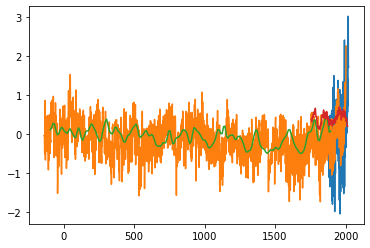

In [28]:
plt.plot(gjmt[:,0],gjmt[:,2]-gjmean)
plt.plot(em2k[:,0],em2k[:,1])
plt.plot(sunsp[-200:,0],sunsp[-200:,1]/60-0.4)
plt.plot(sunsp1749[10*win:-10*win,2],sunman/200)

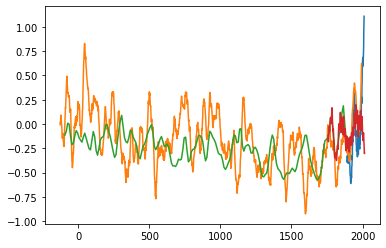

In [29]:
# plt.plot(dfnp[:,0],dfnp[:,1])
plt.plot(gjmt[win:-win,0],gjmtmat)
plt.plot(em2k[win:-win,0],em2kmat)
plt.plot(sunsp[-200:,0],sunsp[-200:,1]/80-0.5) # sunma[-200:]/50-0.5)
plt.plot(sunsp1749[10*win:-10*win,2],sunman/200-0.5)

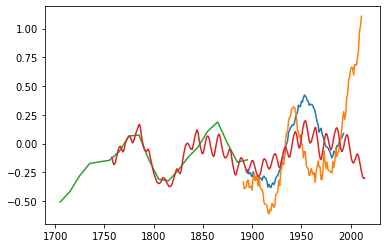

In [30]:
plt.plot(em2k[-120+win:-win,0],em2kmat[-120+win:-win])
plt.plot(gjmt[win:-win,0],gjmtmat)
plt.plot(sunsp[-20:,0],sunsp[-20:,1]/80-0.5) # sunma[-20:]/50-0.5)
plt.plot(sunsp1749[10*win:-10*win,2],sunman/200-0.5)

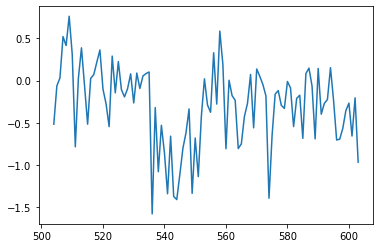

In [31]:
a=-1500
b=-1400
plt.plot(em2k[a:b,0],em2k[a:b,1])
plt.plot(gjmt[a:b,0],gjmtmat[a-win:b-win])
